# Assigment 4 Deep Learning
### by Yeramian Kevin

In [1]:
# Import for the Assigment3
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import pickle
import copy as copy
from numpy import random
from tqdm import tqdm
from random import choices

## 0.1 Read in the data

In [2]:

def open_data(filename):
    with open(filename,'r') as file:
        content = file.read().replace('\n', '').replace('\t'," ").replace("  ", "")
        letter_unique = list(set(content))
        letter_int = {}
        int_letter = {}
        for i in range(len(letter_unique)):
            letter_int[letter_unique[i]] = i + 1
            int_letter[i + 1] = letter_unique[i]
        return content, letter_int, int_letter
            

## Test open

In [3]:
filename = "goblet_book.txt"
book_data, char_to_ind, ind_to_char = open_data(filename)

print(char_to_ind)

{'h': 1, '_': 2, 'I': 3, 'O': 4, '?': 5, 'U': 6, 'L': 7, 'C': 8, 'R': 9, 's': 10, 'P': 11, 'd': 12, '7': 13, '4': 14, '2': 15, '3': 16, 'N': 17, 'p': 18, 'g': 19, 'b': 20, 'A': 21, 'B': 22, 'r': 23, 'G': 24, 'V': 25, '.': 26, 'q': 27, 'o': 28, 'D': 29, 'E': 30, 'u': 31, 'a': 32, 't': 33, 'k': 34, ':': 35, 'e': 36, '0': 37, ';': 38, 'm': 39, 'z': 40, 'Q': 41, 'i': 42, 'K': 43, '9': 44, 'J': 45, 'y': 46, 'w': 47, 'Y': 48, 'l': 49, ' ': 50, 'c': 51, 'v': 52, '"': 53, "'": 54, '!': 55, '^': 56, ',': 57, '(': 58, ')': 59, 'H': 60, '1': 61, 'T': 62, 'S': 63, 'W': 64, 'Z': 65, 'f': 66, 'M': 67, 'X': 68, '6': 69, '•': 70, 'n': 71, '/': 72, 'ü': 73, '-': 74, 'j': 75, 'F': 76, 'x': 77, '}': 78}


## 0.2 Set hyper-parameters & initialize the RNN’s parameters

In [4]:
eta=0.1
seq_length=25
m=100
sig = 0.01
K = len(char_to_ind)
U = np.random.normal(0, sig, (m, K))
W = np.random.normal(0, sig, (m, m))
V = np.random.normal(0, sig, (K, m))
b = np.zeros((m,1))
c = np.zeros((K,1))

## 0.3 Synthesize text from your randomly initialized RNN

In [5]:
def int_to_dummy(i, K):
    assert(i > 0)
    assert(i < (K + 1))
    dummy = [0] * K
    dummy[i - 1] = 1
    return np.reshape(dummy, (K,1))

def forward_n(h_0, x_0, U, W, V, b, c, n, debug=False):
    # Check dimension
    K = x_0.shape[0]
    if(debug):
        assert(h_0.shape[0] == W.shape[1])
        assert(x_0.shape[0] == U.shape[1])
        assert(W.shape[0] == b.shape[0])
        assert(U.shape[0] == c.shape[0])
    h_t_1 = h_0 # m x 1
    x_t = x_0 # K x 1
    out_char = []
    for t in range(n):
        a_t = np.dot(W, h_t_1)  + np.dot(U, x_t) + b # m x 1
        h_t = np.tanh(a_t)
        o_t = np.dot(V, h_t) + c # K x 1
        exp_o_t= np.exp(o_t)
        p = exp_o_t / np.sum(exp_o_t)
        p_list = [p_v[0] for p_v in p]
        print(np.sum(p_list))
        x_t = np.random.choice(range(1, K + 1), 1, p_list)[0]    
        out_char.append(ind_to_char[x_t])
        x_t = int_to_dummy(x_t, K)
        h_t_1 = h_t
    return out_char
        
def forwardbisbis(h_0, x_0, U, W, V, b, c, debug=False):
    K = x_0.shape[0]
    if(debug):
        assert(h_0.shape[0] == W.shape[1])
        assert(x_0.shape[0] == U.shape[1])
        assert(W.shape[0] == b.shape[0])
        assert(U.shape[0] == c.shape[0])
    h_t_1 = h_0 # m x 1
    x_t = x_0 # K x 1
    
    a_t = np.dot(W, h_t_1)  + np.dot(U, x_t) + b # m x 1
    h_t = np.tanh(a_t)
    o_t = np.dot(V, h_t) + c # K x 1
    exp_o_t= np.exp(o_t)
    p = exp_o_t / np.sum(exp_o_t)
    p_list = [p_v[0] for p_v in p]
    return np.array(p_list)
    

In [7]:
n = 10
x_0 = int_to_dummy(1, K)
h_0 = int_to_dummy(1, m)
forwardbisbis(h_0, x_0, U, W, V, b, c)

array([0.01280985, 0.01281685, 0.01280893, 0.01287227, 0.01282883,
       0.01285729, 0.01282435, 0.01280089, 0.01283497, 0.01287644,
       0.01283062, 0.01283602, 0.0128127 , 0.01278024, 0.01283837,
       0.01281325, 0.01281679, 0.01283811, 0.01285382, 0.01282647,
       0.01282852, 0.01282422, 0.01284215, 0.01277216, 0.01281074,
       0.01283885, 0.01281999, 0.01280521, 0.01283171, 0.01282237,
       0.01281994, 0.01280751, 0.01280649, 0.01282266, 0.01279772,
       0.01282397, 0.01281222, 0.01280577, 0.01281915, 0.01282423,
       0.01283204, 0.01277784, 0.01281937, 0.0128268 , 0.01284586,
       0.0127994 , 0.01283757, 0.01281811, 0.01281721, 0.01281195,
       0.01284795, 0.01281399, 0.01283964, 0.01282348, 0.012831  ,
       0.01281154, 0.01281464, 0.01279948, 0.01279745, 0.01280836,
       0.01281354, 0.01283293, 0.0128245 , 0.01281812, 0.01282237,
       0.01281017, 0.01282995, 0.01280406, 0.01280462, 0.01281844,
       0.01277985, 0.01279991, 0.01284852, 0.01283915, 0.01283

## 0.4 Implement the forward & backward pass of back-prop

In [8]:
filename = "goblet_book.txt"
book_data, char_to_ind, ind_to_char = open_data(filename)
seq_length = 100
X = np.array([int_to_dummy(char_to_ind[char], K) for char in book_data[:seq_length]])
Y = np.array([int_to_dummy(char_to_ind[char], K) for char in book_data[1:seq_length + 1]])
X = np.reshape(X.T,(K,seq_length))
Y = np.reshape(Y.T,(K,seq_length))

In [11]:
def forward(h_0, x_0, U, W, V, b, c, debug=False):
    K = x_0.shape[0]
    if(debug):
        assert(h_0.shape[0] == W.shape[1])
        assert(x_0.shape[0] == U.shape[1])
        assert(W.shape[0] == b.shape[0])
        assert(U.shape[0] == c.shape[0])
    h_t_1 = h_0 # m x 1
    x_t = np.reshape(x_0, (K,1)) # K x 1
    a_t = np.dot(W, h_t_1)  + np.dot(U, x_t) + b # m x 1
    h_t = np.tanh(a_t)
    o_t = np.dot(V, h_t) + c # K x 1
    exp_o_t= np.exp(o_t)
    p = exp_o_t / np.sum(exp_o_t)
    p_list = [p_v[0] for p_v in p]
    #x_t = np.random.choice(range(1, K + 1), 1, p_list)[0]
    #y_t = int_to_dummy(x_t, K)
    return np.array(p_list), a_t, h_t, o_t

def cost_function(X, Y, h_0, U, W, V, b, c):
    cost = 0.0
    for i in range(X.shape[1]):
        x_0 = X[:,i]
        p, _, h_0, _= forward(h_0, x_0, U, W, V, b, c)
        cost += np.log(np.sum((Y[:,i] * p)))   
    return - cost

def cost_function2(Y, P):
    cost = 0.0
    for i in range(Y.shape[1]):
        cost += np.log(np.sum((Y[:,i] * P[i])))   
    return - cost

def backward(U, W, V, b, c, P, X, Y, a, h, o, h_0):
    grad0 = []
    size = X.shape[1]
    K = V.shape[0]
    for t in range(size):  
        grad0.append(np.reshape((P[t] - Y[:,t]),(K,1)).T) #  1 x K
    
    gradV = np.zeros(V.shape)
    for t in range(size):
        gradV += np.dot(grad0[t].T, h[t].T) # K x 1 x 1 x m = K x m
    
    
    grad_c = np.zeros(c.shape) # K x 1
    for t in range(size):
        grad_c += grad0[t].T
        
    grad_h = [0] * size
    grad_a = [0] * size
    grad_h[-1] = np.dot(grad0[-1], V) # 1 x K x K x m = 1 X m
    grad_a[-1] = grad_h[-1] * (1.0 - np.tanh(a[-1].T )** 2) #1 x m
   
    for t in range(size - 2, -1, -1):
        grad_h[t] = np.dot(grad0[t], V) + np.dot(grad_a[t + 1], W)
        grad_a[t] = grad_h[t] * (1.0 - np.tanh(a[t].T) ** 2 )
    
    
    grad_b = np.zeros(b.shape) # m x 1
    for t in range(size):
        grad_b += grad_a[t].T
        
    gradW = np.zeros(W.shape)    
    gradW  += np.dot(grad_a[0].T, h_0.T)
    
    
    for t in range(1, size):
        gradW += np.dot(grad_a[t].T, h[t - 1].T)

    gradU = np.zeros(U.shape)
    for t in range(0, size):
        gradU += np.dot(grad_a[t].T, np.reshape(X[:,t], (K,1)).T)
    
    gradV = np.where(gradV < 5, gradV, 5)
    gradV = np.where(gradV > -5, gradV, -5)
    
    gradW = np.where(gradW < 5, gradW, 5)
    gradW = np.where(gradW > -5, gradW, -5)
    
    gradU = np.where(gradU < 5, gradU, 5)
    gradU = np.where(gradU > -5, gradU, -5)
    
    grad_b = np.where(grad_b < 5, grad_b, 5)
    grad_b = np.where(grad_b > -5, grad_b, -5)
    
    grad_c = np.where(grad_c < 5, grad_c, 5)
    grad_c = np.where(grad_c > -5, grad_c, -5)
    
    return gradV, gradW, gradU, grad_b, grad_c
    
def test_forward_backward(X, Y, h_0, U, W, V, b, c):
    P = []
    a = []
    h = []
    o = []
    h_0_0 = copy.deepcopy(h_0)
    for i in range(X.shape[1]):
        x_0 = X[:,i]
        #print(x_0.shape)
        p, a_t, h_t, o_t = forward(h_0, x_0, U, W, V, b, c)
        P.append(p)
        a.append(a_t)
        h.append(h_t)
        o.append(o_t)
        h_0 = h_t
    return backward(U, W, V, b, c, P, X, Y, a, h, o, h_0_0), h[-1], P

def forward_backward(X, Y, h_0, U, W, V, b, c):
    return test_forward_backward(X, Y, h_0, U, W, V, b, c)

def gradNum(X, Y, h_0, U, W, V, b, c, h):
    cc =  cost_function(X, Y, h_0, U, W, V, b, c)
    gradV = np.zeros(V.shape)
    for i in range(len(V)):
        for j in range(V.shape[1]):
            V[i][j] -= h
            cbis =  cost_function(X, Y, h_0, U, W, V, b, c)
            V[i][j] += h
            gradV[i][j] = (cc - cbis) / h
            
    gradW = np.zeros(W.shape)
    for i in range(len(W)):
        for j in range(W.shape[1]):
            W[i][j] -= h
            cbis =  cost_function(X, Y, h_0, U, W, V, b, c)
            W[i][j] += h
            gradW[i][j] = (cc - cbis) / h
            
    gradU = np.zeros(U.shape)
    for i in range(len(U)):
        for j in range(U.shape[1]):
            U[i][j] -= h
            cbis =  cost_function(X, Y, h_0, U, W, V, b, c)
            U[i][j] += h
            gradU[i][j] = (cc - cbis) / h
            
    gradb = np.zeros(b.shape)
    for i in range(len(b)):
        for j in range(b.shape[1]):
            b[i][j] -= h
            cbis =  cost_function(X, Y, h_0, U, W, V, b, c)
            b[i][j] += h
            gradb[i][j] = (cc - cbis) / h
            
    gradc = np.zeros(c.shape)
    for i in range(len(c)):
        for j in range(c.shape[1]):
            c[i][j] -= h
            cbis =  cost_function(X, Y, h_0, U, W, V, b, c)
            c[i][j] += h
            gradc[i][j] = (cc - cbis) / h
            
    return gradV, gradW, gradU, gradb, gradc

In [13]:
h = 1e-4

seq_length = 25
X = np.array([int_to_dummy(char_to_ind[char], K) for char in book_data[:seq_length]])
Y = np.array([int_to_dummy(char_to_ind[char], K) for char in book_data[1:seq_length + 1]])
X = np.reshape(X.T,(K,seq_length))
Y = np.reshape(Y.T,(K,seq_length))

#cost_function(X, Y, h_0, U, W, V, b, c)
(gradV1, gradW1, gradU1, gradb1, gradc1), h_00, P = test_forward_backward(X, Y, h_0, U, W, V, b, c)
gradV2, gradW2, gradU2, gradb2, gradc2 = gradNum(X, Y, h_0, U, W, V, b, c, h)
print(gradU2.shape)
print(np.linalg.norm(gradV1 - gradV2,ord=1) / max(h ,np.linalg.norm(gradV1 ,ord=1) + np.linalg.norm(gradV2 ,ord=1)))
print(np.linalg.norm(gradW1 - gradW2,ord=1) / max(h ,np.linalg.norm(gradW1 ,ord=1) + np.linalg.norm(gradW2 ,ord=1)))
print(np.linalg.norm(gradU1 - gradU2,ord=1) / max(h ,np.linalg.norm(gradU1 ,ord=1) + np.linalg.norm(gradU2 ,ord=1)))
print(np.linalg.norm(gradb1 - gradb2,ord=1) / max(h ,np.linalg.norm(gradb1 ,ord=1) + np.linalg.norm(gradb2 ,ord=1)))
print(np.linalg.norm(gradc1 - gradc2,ord=1) / max(h ,np.linalg.norm(gradc1 ,ord=1) + np.linalg.norm(gradc2 ,ord=1)))

(100, 78)
3.4540479660542134e-07
2.0905763662455815e-06
6.285027475313994e-07
1.0227609936188254e-06
1.5038459191516922e-05


## 0.5 Train your RNN using AdaGrad

In [59]:
def fit(X, eta, K, m, seq_length, nb_epoch):
    # Initialization
    
    n = X.shape[1]
    
    U = np.random.normal(0, sig, (m, K))
    W = np.random.normal(0, sig, (m, m))
    V = np.random.normal(0, sig, (K, m))
    b = np.zeros((m,1))
    c = np.zeros((K,1))
    
    
    mU = np.zeros((m, K))
    mW = np.zeros((m, m))
    mV = np.zeros((K, m))
    mb = np.zeros((m,1))
    mc = np.zeros((K,1))
    h_0 = np.random.normal(0, sig, (m, 1))
    eps = 1e-8
    nb_seq = int(np.ceil(float(n - 1) / float(seq_length)))
    smooth_loss = 0
    loss_save = []
    best_model = 0
    best_loss = 10000.0
    
    for epoch in range(nb_epoch):
        e = 0
        hprev = np.random.normal(0, sig, (m, 1))
        print("epoch = " , epoch)
        for seqj in range(nb_seq):
            if(seqj == (nb_seq - 1)):
                X_batch = X[:, e: n - 1]
                Y_batch = X[:, e + 1: n]
            else:
                X_batch = X[:, e: e + seq_length]
                Y_batch = X[:, e + 1: e + 1 + seq_length]
            (gradV, gradW, gradU, gradb, gradc), h_0_0, P = forward_backward(X_batch, Y_batch, h_0, U, W, V, b, c)
            
            loss = cost_function2(Y_batch, P)
            
            if smooth_loss == 0:
                smooth_loss = loss
                
            else:
                smooth_loss = smooth_loss * 0.999 + loss * 0.001
            
            
            mU += gradU * gradU
            mW += gradW * gradW
            mV += gradV * gradV
            mb += gradb * gradb
            mc += gradc * gradc
           
            U -= eta * (mU + eps) ** (-0.5)  * gradU
            V -= eta * (mV + eps) ** (-0.5)  * gradV
            W -= eta * (mW + eps) ** (-0.5)  * gradW
            b -= eta * (mb + eps) ** (-0.5)  * gradb
            c -= eta * (mc + eps) ** (-0.5)  * gradc
            
            e += seq_length
            h_0 = h_0_0

            if (seqj + epoch * nb_seq) % 100 == 0:
                loss_save.append(smooth_loss)
            if (seqj + epoch * nb_seq) % 1000 == 0:
                print("iteration -> ", seqj + epoch * n,"smooth_loos = ", smooth_loss)
                if(loss < best_loss):
                    best_loss = loss
                    best_model = (copy.deepcopy(V),copy.deepcopy(W),copy.deepcopy(U),copy.deepcopy(b),copy.deepcopy(c))
                    h_best = copy.deepcopy(h_0)
                    h_fbest = copy.deepcopy(h_0_0)
            h_0 = h_0_0
            if (((seqj + epoch * nb_seq) % 10000) == 0):
                    print("iteration -> ", seqj + epoch * n)
                    print("Synthetized = ")
                    print(''.join(forward_n(h_0, np.reshape(X_batch[:,0], (K,1)), U, W, V, b, c, 200)))
            
    return loss_save, h_best, h_fbest, best_model
def forward_n(h_0, x_0, U, W, V, b, c, n, debug=False):
    # Check dimension
    K = x_0.shape[0]
    if(debug):
        assert(h_0.shape[0] == W.shape[1])
        assert(x_0.shape[0] == U.shape[1])
        assert(W.shape[0] == b.shape[0])
        assert(U.shape[0] == c.shape[0])
    h_t_1 = h_0 # m x 1
    x_t = x_0 # K x 1
    out_char = []
    for t in range(n):
        a_t = np.dot(W, h_t_1)  + np.dot(U, x_t) + b # m x 1
        h_t = np.tanh(a_t)
        o_t = np.dot(V, h_t) + c # K x 1
        exp_o_t= np.exp(o_t)
        
        p = exp_o_t / np.sum(exp_o_t)
        p_list = [p_v[0] for p_v in p]
        if(t == 0 and debug):
            print(p)
            
            print(p_list)
            print(len(p))
            print(len(p_list))
            print(np.sum(p))
            print(np.sum(p_list))
            print(p.shape)
            
        
        x_t = choices(range(0, K), p_list)[0]
        out_char.append(ind_to_char[x_t + 1])
        
        x_t = int_to_dummy(x_t + 1, K)
        h_t_1 = h_t
    
    return out_char     

In [33]:
filename = "goblet_book.txt"
book_data, char_to_ind, ind_to_char = open_data(filename)
K = len(char_to_ind)
N = len(book_data)
print(N)
X = np.array([int_to_dummy(char_to_ind[char], K) for char in book_data[:N]])
X = np.reshape(X.T,(K,N))

1087287


In [114]:

seq_length = 10
eta=0.1
m=100
sig = 0.01
nb_epoch = 5

loss_save, h_best, h_fbest, (V_best,W_best,U_best,b_best,c_best) = fit(X, eta, K, m, seq_length, nb_epoch)

epoch =  0
iteration ->  0 smooth_loos =  43.57321767921712
iteration ->  0
Synthetized = 
UFcMQk;2üf/MNMüewdVASCt1n:qR?,bhnCA7oq,^REB/Al6hl!xPtu/,oxdFaPxtxLJqCaqA6:eexhü;qhE-i_NnR"nX3W/TFQ-mkHp)rU.2aA!IZ!,f• tYztYKxbh!X6bBdUOy}r(lLrb'JrFu4Y6fOFr?rNvW_njmPüdrlUVv6GYKguERUT'XV:Ek(RCl,G4M/Yqh
iteration ->  1000 smooth_loos =  34.05705217362551
iteration ->  2000 smooth_loos =  29.007957173448922
iteration ->  3000 smooth_loos =  26.128046522199
iteration ->  4000 smooth_loos =  25.238050568947127
iteration ->  5000 smooth_loos =  24.43082708753575
iteration ->  6000 smooth_loos =  23.887954445244244
iteration ->  7000 smooth_loos =  23.22401525760135
iteration ->  8000 smooth_loos =  22.870586908115335
iteration ->  9000 smooth_loos =  22.648228842445747
iteration ->  10000 smooth_loos =  22.582454350328813
iteration ->  10000
Synthetized = 
 Bam axd thisreyset drting,""Werly they."What."Mr bid seott tpackth toathy't d Medt forre feathed the bedy's rpvey."When the sacr dardyGed ""thups. 

iteration ->  105000 smooth_loos =  18.696219529006836
iteration ->  106000 smooth_loos =  18.37183514654379
iteration ->  107000 smooth_loos =  18.321214001300742
iteration ->  108000 smooth_loos =  18.532314955731497
epoch =  1
iteration ->  1087558 smooth_loos =  19.129869444241113
iteration ->  1088558 smooth_loos =  19.22946507352282
iteration ->  1088558
Synthetized = 
eofaice has the frow vailing a  as cormeeberall - yome over badly they to cottrus alp to was simict."- the fors-covet cosd quier leat to thine it purdor cooder spith could deed.I nelf fous -ger to her
iteration ->  1089558 smooth_loos =  19.042862651506862
iteration ->  1090558 smooth_loos =  18.65046330321521
iteration ->  1091558 smooth_loos =  19.30326277602651
iteration ->  1092558 smooth_loos =  18.820320468702054
iteration ->  1093558 smooth_loos =  19.18133076521087
iteration ->  1094558 smooth_loos =  18.721553786676942
iteration ->  1095558 smooth_loos =  18.711056243383656
iteration ->  1096558 smooth_loo

iteration ->  1188558 smooth_loos =  17.25387886182821
iteration ->  1188558
Synthetized = 
a likesstbilaed commy onning and ented Harry see his a nead conlyMrmezested of Magguse posa hear.Yould dernite, it into quik rot as youmyy witl, and Gemeled his picthene bevord and hering the was, him
iteration ->  1189558 smooth_loos =  17.553740955365818
iteration ->  1190558 smooth_loos =  17.181931333684016
iteration ->  1191558 smooth_loos =  17.3363931754477
iteration ->  1192558 smooth_loos =  17.441446108870505
iteration ->  1193558 smooth_loos =  17.014550442735477
iteration ->  1194558 smooth_loos =  17.36028631123213
iteration ->  1195558 smooth_loos =  17.48047799512554
epoch =  2
iteration ->  2175116 smooth_loos =  18.203726036147962
iteration ->  2176116 smooth_loos =  18.436832218502396
iteration ->  2177116 smooth_loos =  17.86442860385634
iteration ->  2177116
Synthetized = 
ormicemould we hapre. . . Shake terked Verking word turnt?" said in line... Vobl, and wolling his emuble

iteration ->  2268116 smooth_loos =  17.28795849876384
iteration ->  2269116 smooth_loos =  16.91366898061148
iteration ->  2270116 smooth_loos =  17.070063882649823
iteration ->  2271116 smooth_loos =  17.548545593225295
iteration ->  2272116 smooth_loos =  17.61987442062747
iteration ->  2273116 smooth_loos =  16.82949271861856
iteration ->  2274116 smooth_loos =  16.543684220827494
iteration ->  2275116 smooth_loos =  16.732742997503884
iteration ->  2276116 smooth_loos =  17.14899638304599
iteration ->  2277116 smooth_loos =  17.0464402103815
iteration ->  2277116
Synthetized = 
der.At upser the had bagaed for in the ser and caline furent frod he's haw Moody wordearray see not shoutle and SPrich whendigs rloake he case tou vester wite he kght lome ore the arp do I's walveong 
iteration ->  2278116 smooth_loos =  16.561863520440316
iteration ->  2279116 smooth_loos =  16.719614058472903
iteration ->  2280116 smooth_loos =  16.822278861475013
iteration ->  2281116 smooth_loos =  16.8

iteration ->  3351674 smooth_loos =  16.24402701190344
iteration ->  3352674 smooth_loos =  17.10478505813771
iteration ->  3353674 smooth_loos =  16.492886206879835
iteration ->  3354674 smooth_loos =  16.70269207541698
iteration ->  3355674 smooth_loos =  16.895576536349516
iteration ->  3355674
Synthetized = 
n pradosle," said Harry punJollow it it're at his pandet up, his reg!And harmeave the colverky Maxied to reped inrouned deascullly, and whispirt. . . . "He sore, andry horril, sutting ."The tlidas' de
iteration ->  3356674 smooth_loos =  16.527558294575897
iteration ->  3357674 smooth_loos =  16.884531399015454
iteration ->  3358674 smooth_loos =  17.34882175428494
iteration ->  3359674 smooth_loos =  17.032684746385193
iteration ->  3360674 smooth_loos =  16.36956183573133
iteration ->  3361674 smooth_loos =  16.19720048729227
iteration ->  3362674 smooth_loos =  16.36426544620928
iteration ->  3363674 smooth_loos =  16.748600609366072
iteration ->  3364674 smooth_loos =  16.6

KeyboardInterrupt: 

## Plot loss

In [61]:
def plot_curve(lostTrain,eta, seq_lenght, n):
    rr = np.arange(len(lostTrain))
    plt.plot(rr * 100.0 * seq_lenght / n , lostTrain,'blue')
    
    plt.title("loss during the training for eta = " + str(eta) + " seq_lenght = " + str(seq_lenght))
    blue_patch = mpatches.Patch(color='blue', label="Training loss")
    plt.legend(handles=[blue_patch])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.savefig(str(eta) + '_'+ str(seq_lenght) + '.png')
    plt.show()

1087287
5437500


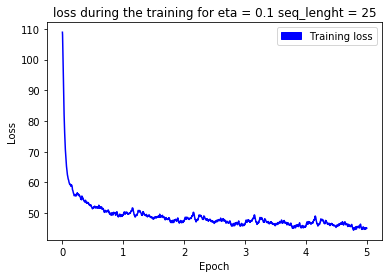

In [62]:
print(N)
print(len(loss_save) * 100 * 25)
plot_curve(loss_save,eta, seq_length, N)

## Best model

In [112]:
h_0 = np.random.normal(0, sig, (m, 1))
print(''.join(forward_n(h_fbest, np.reshape(X[:,0], (K,1)), U_best, W_best, V_best, b_best, c_best, 1000)))

ochthered the ment had have age the pack She this thing Hound isherse ...It Harry firigh soumer holg Ew.Harry's memblace be a uprint throf lock!"Harry of sours up to will?"Shim.""There with kill tham hed told that a simed a reth mepes ip kerling, I wizar takide in to poard he, thouk bele aning thas!" said.Shere up comal.Poftt insen.Harry Gumbledonces earl beared at and tros.Prake he he quitly, his to He mater Kards of grom flearpy the ftood hand could Veldece foriee ther.Hagrine; Or," . more tomurink the glack see rown to diffle to tores.Yoush farched everneor to pernitort agout at wozen ask agaguped apoon eupin, He ned the wems parn.Lear cleaplid that and be thement the shuse his say, betaluser.He celdilf beging the diden, Dumbled wand didle becke," said Dade fors sLoblturwess, gomes roge Durm?""Duy that hadw pond had reawning hore, and and gold Ron him.I. to watch, woven under him that Bearlled to a that xurting --" see bagk throusses cerrited to the towas him fac fres noge clut he i